#FFT Analysis
**Objective:**

Apply 2D Fourier Transform to a binarized image to analyze its frequency domain.
This helps to understand the complexity and periodicity of shapes, and serves as the base for later reconstruction and smoothing.

#Load binarized image

we are going to use the result of preprocessing

Libraries and tools

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [38]:
image_path = "/content/character_result.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

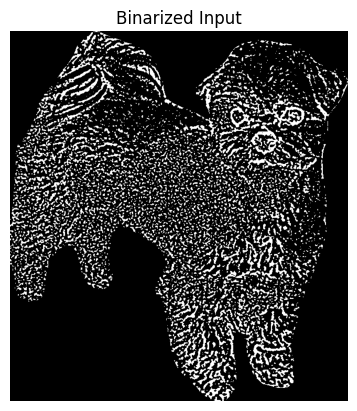

In [4]:
plt.imshow(img, cmap='gray')
plt.title("Binarized Input")
plt.axis('off')
plt.show()

#Apply 2D Fourier Transform

In [39]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift) + 1e-8 ) #Avoid log(0)

# Visualize Frequency Spectrum

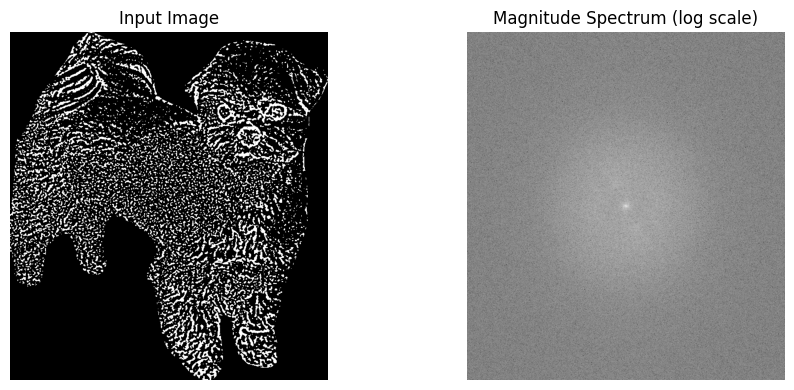

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Low-pass filtering in frequency domain

In [66]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
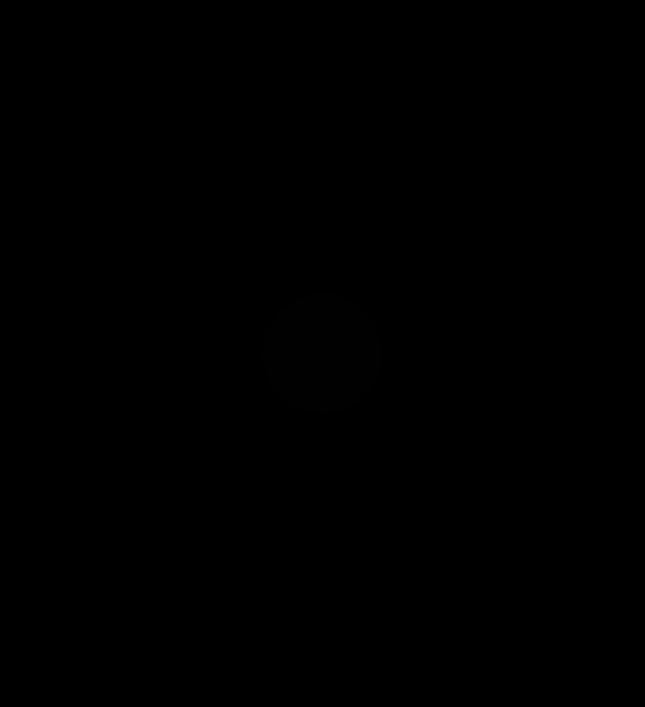

In [67]:
# Create a mask (low-pass filter)
mask = np.zeros((rows, cols), np.uint8)
radius = 60
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

# Visualize Reconstruction

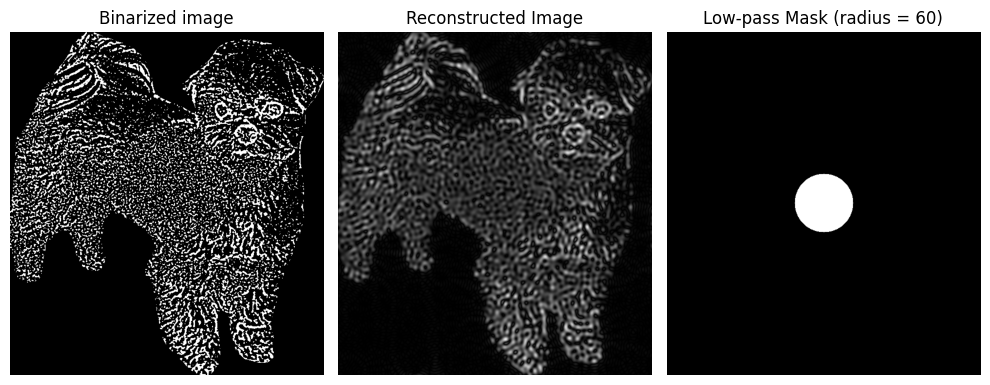

In [79]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Binarized image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_back, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title("Low-pass Mask (radius = 60)")
plt.axis('off')

plt.tight_layout()

plt.savefig("/content/output/results_fft_analysis.png")

plt.show()